<table width="100%" style="padding:0; margin-left:-6px;">
    <tr style="padding=0;" width="100%">
        <td width="auto">
           <hr style="border:2px solid darkblue">
            <h1> nbX. Query by scientific category and select columns to show</h1>
           <hr style="border:2px solid darkblue">
        </td>
        <td width="60px">
           <img src="ALMAsmall.png" align="right"/> 
        </td>
    </tr>
</table>    

**This Notebook builds off of example notebook #4: nb4_ALMA_Query_by_science_keyword.ipynb**

**Find more here: https://almascience.nrao.edu/alma-data/archive/archive-notebooks**

The relevant columns in the ALMA TAP service are:
* *science_category* 
* *science_keyword*
 
--------- ----- -----

The scientific categories of observations in ALMA are the more general groups. These are:
* Active galaxies
* Cosmology
* Disks and planet formation
* Galaxy evolution
* ISM and star formation
* Local Universe
* Solar system
* Stars and stellar evolution
* Sun

--------- ----- -----

Then, define which columns should be displaye, and in what order.


In [1]:
import numpy as np
from astropy.table import Table
import pyvo
import sys
import matplotlib.pyplot as plt
import pandas as pd

from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.time import Time

from IPython.display import display, HTML


# service = pyvo.dal.TAPService("https://almascience.eso.org/tap")      # for the EU ALMA TAP service
# service = pyvo.dal.TAPService("https://almascience.nao.ac.jp/tap")  # for the EA ALMA TAP service

service = pyvo.dal.TAPService("https://almascience.nrao.edu/tap")   # for the NA ALMA TAP service

<hr style="border:2px solid darkblue"> </hr>


## Query scientific category
<hr style="border:2px solid darkblue"> </hr>



In [2]:
def query_scientific_category(service, scientific_category):
    """Query for all observations of a given scientific category"""
    
    query = f"""  
            SELECT * 
            FROM ivoa.obscore  
            WHERE scientific_category = '{scientific_category}'  
            AND science_observation = 'T'  
            """

    return service.search(query).to_table().to_pandas()

<hr style="border:2px solid darkblue"> </hr>


## Select columns of interest
<hr style="border:2px solid darkblue"> </hr>



In [3]:
def select_which_columns(df_in,columns):
    """Allows you to select (and format) specific columns within the input dataframe"""
    
    df = df_in[columns]
    # Ensure we're working on a copy to avoid chained assignment
    df = df.copy()

    if (('s_ra' in columns) and not ('s_dec' in columns)) or (('s_dec' in columns) and not ('s_ra' in columns)):
        print('You selected RA and not Dec, or Dec and not RA.  If you want coordinates, please select both.')

    if (('s_ra' in columns) and ('s_dec' in columns)):
        # Convert RA/Dec to sexagesimal
        coords = SkyCoord(ra=df['s_ra'].values * u.deg,
                          dec=df['s_dec'].values * u.deg)

        df.loc[:, 'ra_hms'] = coords.ra.to_string(unit=u.hour, sep=':', precision=2, pad=True)
        df.loc[:, 'dec_dms'] = coords.dec.to_string(unit=u.deg, sep=':', precision=2, alwayssign=True, pad=True)
        # Drop original numeric columns
        df = df.drop(columns=['s_ra', 's_dec'])    

    if ('t_min' in columns):
        # Convert t_min from MJD to Time objects
        t_min_astropy = Time(df['t_min'].values, format='mjd')
        # Convert to full ISO datetime strings
        t_min_iso = t_min_astropy.to_value('iso', subfmt='date_hms')
        # Use .loc to assign extracted date and time strings
        df.loc[:, 't_min_date'] = [dt.split()[0] for dt in t_min_iso]
        df.loc[:, 't_min_time'] = [dt.split()[1] for dt in t_min_iso]

        # Drop original numeric columns
        df = df.drop(columns=['t_min'])    

    if ('t_max' in columns):
        # Convert t_max from MJD to Time objects
        t_max_astropy = Time(df['t_max'].values, format='mjd')
        # Convert to full ISO datetime strings
        t_max_iso = t_max_astropy.to_value('iso', subfmt='date_hms')
        # Use .loc to assign extracted date and time strings
        df.loc[:, 't_max_date'] = [dt.split()[0] for dt in t_max_iso]
        df.loc[:, 't_max_time'] = [dt.split()[1] for dt in t_max_iso]

        # Drop original numeric columns
        df = df.drop(columns=['t_max'])    
    
    return df
    

<hr style="border:2px solid darkblue"> </hr>


## Examples 

<hr style="border:2px solid darkblue"> </hr>




-------------------------------------------------

## Example a: Use case for time domain astronomy 


In [4]:
## Select a single category from the list at the start of this notebook.
my_category = 'Stars and stellar evolution'
output_timedomain = query_scientific_category(service, my_category)

<Axes: ylabel='count'>

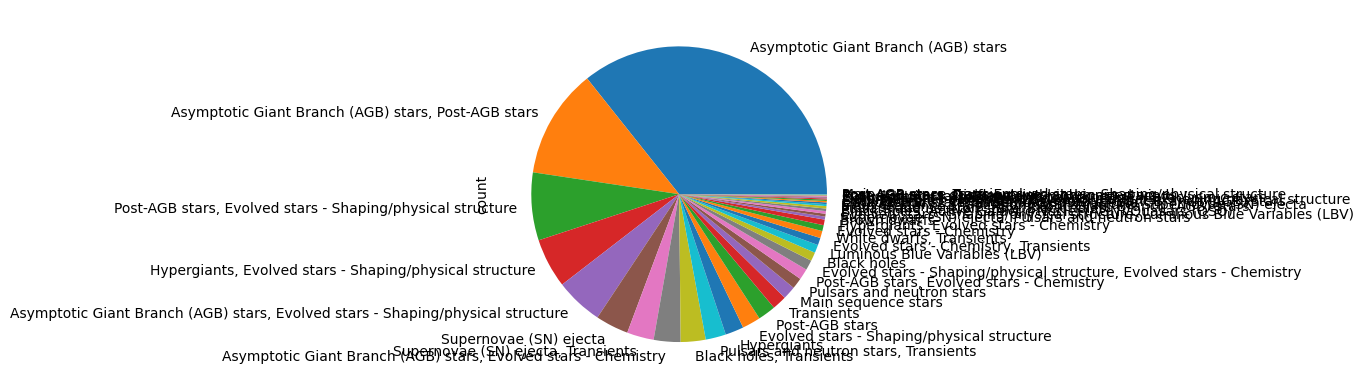

In [5]:
## You can see all of keywords within that category
output_timedomain['science_keyword'].value_counts().plot.pie()

In [6]:
## Select one (or more) of the keywords.  
my_keyword = 'Transients'
filtered_df = output_timedomain[output_timedomain['science_keyword'] == my_keyword ]

In [7]:
numrows = filtered_df.shape[0]
listprojects = filtered_df['obs_publisher_did'].unique()
numprojects = listprojects.shape[0]
print('Found {0} rows, and {1} unique projects'.format(numrows,numprojects))

Found 206 rows, and 17 unique projects


In [8]:
## print out the projects, if you're interested
listprojects

array(['ADS/JAO.ALMA#2013.1.00661.S', 'ADS/JAO.ALMA#2012.1.00875.T',
       'ADS/JAO.ALMA#2016.A.00015.S', 'ADS/JAO.ALMA#2017.1.00975.S',
       'ADS/JAO.ALMA#2018.1.00336.S', 'ADS/JAO.ALMA#2018.1.01405.T',
       'ADS/JAO.ALMA#2018.A.00064.T', 'ADS/JAO.ALMA#2018.1.01617.T',
       'ADS/JAO.ALMA#2019.1.01482.T', 'ADS/JAO.ALMA#2022.A.00010.T',
       'ADS/JAO.ALMA#2021.1.00657.T', 'ADS/JAO.ALMA#2022.A.00025.T',
       'ADS/JAO.ALMA#2022.A.00030.T', 'ADS/JAO.ALMA#2023.1.01090.S',
       'ADS/JAO.ALMA#2024.A.00003.T', 'ADS/JAO.ALMA#2024.A.00009.T',
       'ADS/JAO.ALMA#2024.1.01174.T'], dtype=object)

In [9]:
## Now check out the columns you might be interested in
## You can choose any (or all) of these.
filtered_df.columns

Index(['pol_states', 'obs_publisher_did', 'obs_collection', 'facility_name',
       'instrument_name', 'obs_id', 'dataproduct_type', 'calib_level',
       'collections', 'target_name', 's_ra', 's_dec', 's_fov', 's_region',
       's_xel1', 's_xel2', 'em_xel', 't_xel', 'pol_xel', 's_resolution',
       't_min', 't_max', 't_exptime', 't_resolution', 'em_min', 'em_max',
       'em_res_power', 'sensitivity_10kms', 'cont_sensitivity_bandwidth',
       'pwv', 'group_ous_uid', 'member_ous_uid', 'asdm_uid', 'obs_title',
       'type', 'scan_intent', 'science_observation', 'spatial_scale_max',
       'qa2_passed', 'bib_reference', 'science_keyword', 'scientific_category',
       'pi_userid', 'pi_name', 'spectral_resolution', 'lastModified', 'o_ucd',
       'access_url', 'access_format', 'access_estsize', 'proposal_id',
       'data_rights', 'gal_longitude', 'gal_latitude', 'band_list',
       'em_resolution', 'bandwidth', 'antenna_arrays', 'is_mosaic',
       'obs_release_date', 'spatial_resolu

In [16]:
## Select which columns you want, include it as a list
my_columns = ['obs_publisher_did','target_name','s_ra','s_dec','t_min','t_max','frequency','band_list']

my_df = select_which_columns(filtered_df, my_columns)



In [17]:
## There are several rows for each observation, which represent different frequencies that were observed.
## You can set this to "True" if you wnat to collapse your table to include fewer rows.
collapse_on_frequency = True
if collapse_on_frequency:
    my_df = my_df.drop_duplicates(subset=['obs_publisher_did', 'target_name'])


In [18]:
# Render a scrollable table with a fixed height
display(HTML(my_df.to_html(max_rows=None, notebook=True)))


,obs_publisher_did,target_name,frequency,band_list,ra_hms,dec_dms,t_min_date,t_min_time,t_max_date,t_max_time
256,ADS/JAO.ALMA#2013.1.00661.S,Eta_Carinae,218.526673,6,10:45:03.58,-59:41:04.25,2015-01-29,06:51:15.581,2015-04-03,03:49:43.046
425,ADS/JAO.ALMA#2012.1.00875.T,GRB_Afterglows,339.960043,7,23:00:16.10,-05:22:05.10,2013-11-16,23:28:51.946,2013-11-17,00:38:41.050
1267,ADS/JAO.ALMA#2016.A.00015.S,GRB161219B,104.503970,3,06:06:51.32,-26:47:30.60,2017-01-13,05:33:06.739,2017-01-13,05:51:21.254
2800,ADS/JAO.ALMA#2017.1.00975.S,SN_2015bn,242.011034,6,11:33:41.57,+00:43:32.20,2018-04-08,01:00:35.626,2018-04-08,01:12:50.026
3089,ADS/JAO.ALMA#2017.1.00975.S,SN_2016ard,240.014503,6,14:10:44.56,-10:09:35.42,2018-06-23,00:59:16.742,2018-06-28,02:53:11.674
3532,ADS/JAO.ALMA#2018.1.00336.S,V838_Mon,216.500014,6,07:04:04.82,-03:50:50.50,2019-06-20,16:50:46.147,2019-06-20,21:08:22.848
3556,ADS/JAO.ALMA#2018.1.01405.T,GRB_pol,90.505816,3,03:38:01.17,-26:56:46.73,2019-01-14,23:15:15.811,2019-01-15,02:10:16.954
3838,ADS/JAO.ALMA#2018.A.00064.T,FRB121102,90.488794,3,05:31:58.70,+33:08:52.55,2019-08-31,10:49:01.862,2019-08-31,11:50:57.840
4095,ADS/JAO.ALMA#2018.1.01617.T,AT_2019osy,102.493439,3,00:55:47.40,-27:04:33.00,2019-08-28,05:06:57.802,2019-08-28,06:11:03.206
4213,ADS/JAO.ALMA#2018.1.00336.S,V1309_Sco,355.294887,7,17:57:32.93,-30:43:09.94,2019-08-26,01:34:04.253,2019-08-28,01:22:56.035
